In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings 

warnings. simplefilter(action = "ignore", category = Warning)

In [37]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
fraud = data[data.Class == 1]
valid = data[data.Class == 0]
fraud_transc_percentage = (len(fraud)/len(data))*100

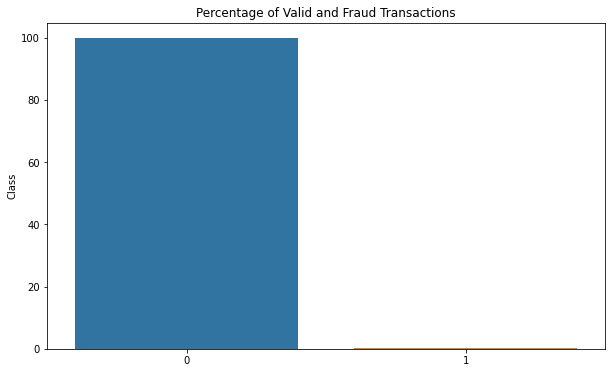

In [33]:
#Ploting the difference between fraud vs valid transation
vf = data["Class"].value_counts(normalize = True)    
fig = plt.figure(figsize=(10,6))
sns.barplot(vf.index, vf*100).set_title("Percentage of Valid and Fraud Transactions")
plt.show()

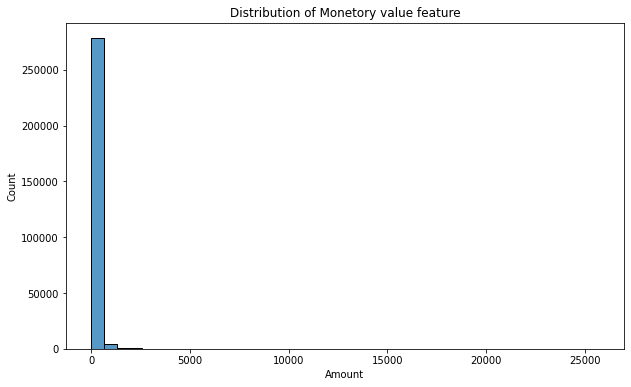

In [40]:
#plpoting the mometory values over time
fig= plt.figure(figsize=(10,6))
sns.histplot(data["Amount"], bins = 40).set_title("Distribution of Monetory value feature")
plt.show()

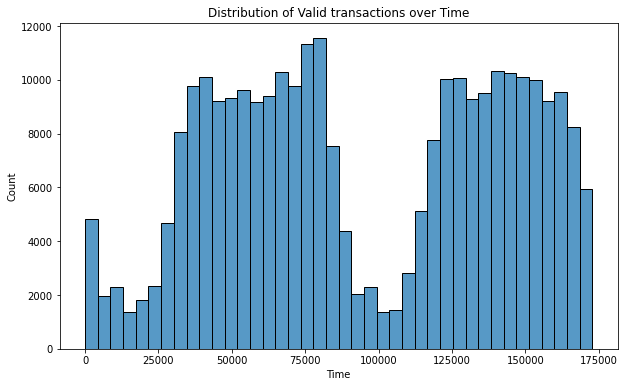

In [47]:
#ploting the distribution of valid transation over time
fig = plt.figure(figsize=(10,6))
sns.histplot(valid["Time"], bins = 40).set_title("Distribution of Valid transactions over Time")
plt.show()

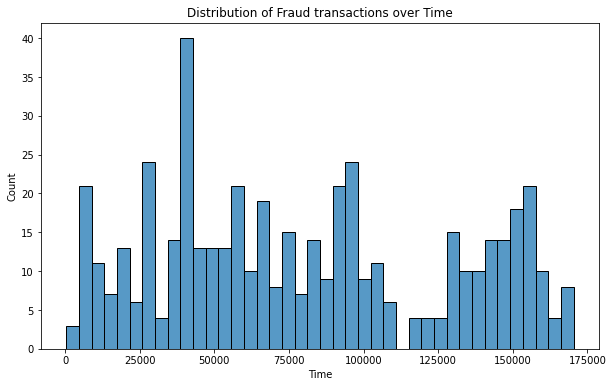

In [48]:
#ploting the distribution of fraud transation over time
fig = plt.figure(figsize=(10,6))
sns.histplot(fraud["Time"], bins = 40).set_title("Distribution of Fraud transactions over Time")
plt.show()

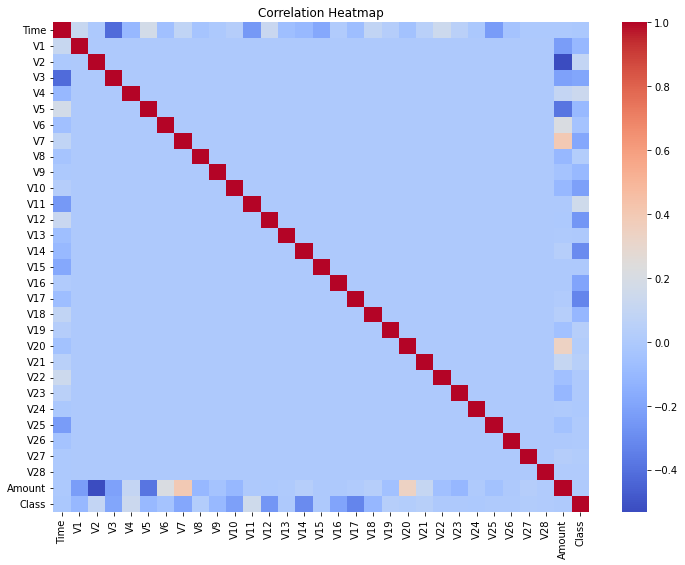

In [55]:
# ploting the corelation matrix of the values in the dataSet
fig =plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), cmap = sns.color_palette("coolwarm", as_cmap = True)).set_title("Correlation Heatmap");
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data['Normalized_amount'] = StandardScaler().fit_transform(data.Amount.values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
X = data.drop(['Class'], axis = 1)
y = data.Class

In [8]:
X.shape

(284807, 30)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [10]:
y_train.shape,y_train.shape

((199364,), (199364,))

In [11]:
y_test.shape

(85443,)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
random_forest = RandomForestClassifier()

In [14]:
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [15]:
y_pred = random_forest.predict(X_test)

In [16]:
random_forest.score(X_test,y_test)


0.9995201479348805

In [17]:
pickle.dump(random_forest,open('random_forest.plk','wb'))

In [78]:
def compute_performance(model, X_train, y_train, X_test, y_test):
   model.fit(X_train, y_train)
   Y_pred = model.predict(X_test)
   
  
   
   accuracy = random_forest.score(X_test,y_test)
   'Accuracy: ', accuracy
   
   "Confusion Matrix: "
   cm = confusion_matrix(y_test, y_pred)
   
   group_names = ['True Neg','True Pos','False Neg','False Pos']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   
   fig = plt.figure(figsize = (12,9))
   sns.heatmap(cm, annot=labels, fmt="", cmap='Reds')
   plt.show()

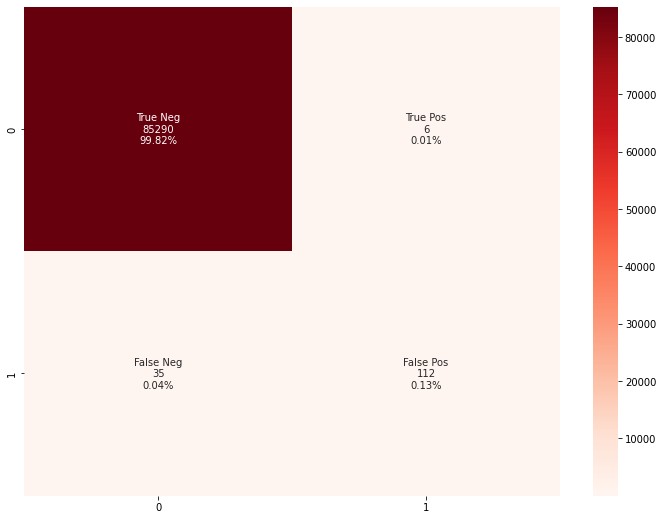

In [79]:
compute_performance(random_forest, X_train, y_train, X_test, y_test)